**Baylon, Karyle Zhienelle V. - 4CSD**

*   Topic: Geospatial and Temporal Data Visualization
*   Dataset: All Weekly Excess Deaths (Global)
*   Software: Python or SAS Viya

After completing this lab, students will be able to:
1. Visualize temporal patterns of excess deaths using Python or SAS Viya.
2. Create geospatial maps showing the distribution of deaths across countries.
3. Combine spatial and temporal analysis to uncover global mortality trends.
4. Interpret insights from visual patterns and relate them to real-world events.

**Task 1: Load and Explore the Dataset**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
# Load the dataset
df = pd.read_csv("all_weekly_excess_deaths.csv")

In [19]:
# Display the first few rows
df.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435


In [20]:
# Check data types and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   5770 non-null   object 
 1   region                    5770 non-null   object 
 2   region_code               5770 non-null   int64  
 3   start_date                5770 non-null   object 
 4   end_date                  5770 non-null   object 
 5   days                      5770 non-null   int64  
 6   year                      5770 non-null   int64  
 7   week                      5770 non-null   int64  
 8   population                5770 non-null   int64  
 9   total_deaths              5770 non-null   float64
 10  covid_deaths              5770 non-null   int64  
 11  expected_deaths           5770 non-null   float64
 12  excess_deaths             5770 non-null   float64
 13  non_covid_deaths          5770 non-null   float64
 14  covid_de

,0
country,0
region,0
region_code,0
start_date,0
end_date,0
days,0
year,0
week,0
population,0
total_deaths,0


**Task 2: Process and Prepare the Data**

In [21]:
# Convert start_date to a proper date format
df['year_week'] = df['year'].astype(str) + '-W' + df['week'].astype(str)
df['date'] = pd.to_datetime(df['year_week'] + '-1', format='%G-W%V-%u', errors='coerce')

In [22]:
# Verify conversion
df[['year_week', 'date']].head()

,year_week,date
0,2020-W1,2019-12-30
1,2020-W2,2020-01-06
2,2020-W3,2020-01-13
3,2020-W4,2020-01-20
4,2020-W5,2020-01-27


**Task 3: Temporal Visualization**

In [23]:
# Aggregate excess deaths globally
global_trend = df.groupby('date')['excess_deaths'].sum().reset_index()

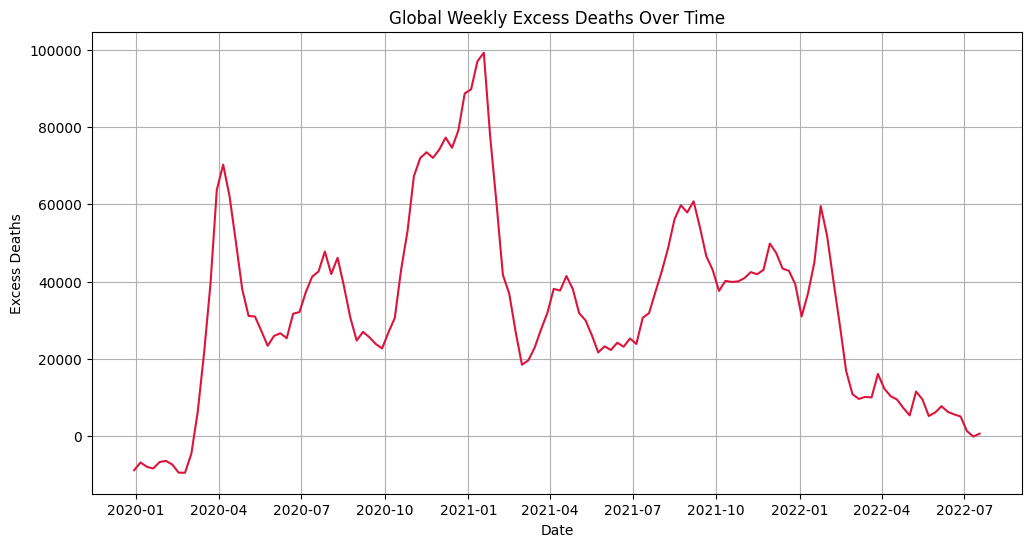

In [24]:
# Plot the global trend
plt.figure(figsize=(12,6))
plt.plot(global_trend['date'], global_trend['excess_deaths'], color='crimson')
plt.title('Global Weekly Excess Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Excess Deaths')
plt.grid(True)
plt.show()

**Task 4: Geospatial Visualization (Choropleth Map)**

In [25]:
# Get the latest week’s data
latest_week = df['date'].max()
latest_data = df[df['date'] == latest_week]

In [26]:
# Create a world map
fig = px.choropleth(
    latest_data,
    locations="country",
    locationmode="country names",
    color="excess_deaths",
    hover_name="country",
    color_continuous_scale="Reds",
    title=f"Global Excess Deaths - {latest_week.strftime('%Y-%m-%d')}"
)
fig.show()

**Task 5: Spatiotemporal Animation**

In [27]:
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="excess_deaths",
    animation_frame="year_week",
    title="Animated Global Excess Deaths Over Time",
    color_continuous_scale="Reds"
)
fig.show()

**Task 6: Normalization**

In [28]:
# Normalize excess deaths to per 100,000 population
df['excess_deaths_per_100k'] = (df['excess_deaths'] / df['population']) * 100000

# Check the first few rows to confirm the new column
df[['country', 'excess_deaths', 'population', 'excess_deaths_per_100k']].head()

,country,excess_deaths,population,excess_deaths_per_100k
0,Australia,-39.372893,25921089,-0.151895
1,Australia,-54.539560,25921089,-0.210406
2,Australia,-18.039560,25921089,-0.069594
3,Australia,66.627107,25921089,0.257038
4,Australia,9.960440,25921089,0.038426


In [29]:
# Get the latest week’s data
latest_week = df['date'].max()
latest_data = df[df['date'] == latest_week]

# Create a world map using excess deaths per 100k
fig = px.choropleth(
    latest_data,
    locations="country",
    locationmode="country names",
    color="excess_deaths_per_100k",  # Use the normalized variable
    hover_name="country",
    color_continuous_scale="Reds",
    title=f"Global Excess Deaths per 100K - {latest_week.strftime('%Y-%m-%d')}"
)
fig.show()

In [30]:
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="excess_deaths_per_100k", # Use the normalized variable
    animation_frame="year_week",
    title="Animated Global Excess Deaths per 100K Over Time",
    color_continuous_scale="Reds"
)
fig.show()